As a last analysis step, we control maximally for all metadata like software versioning, codec, bitrate etc. To do this we take the 10 recordings with the most submissions (all beatles songs) since these have around 90-100 submissions (which is still a relatively low sample size, but the best we can do given the current dataset)

In [27]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(8, 8)})

from tqdm.notebook import tqdm
tqdm().pandas()

# Non-pooled variance
def get_variance(submission):
    variances = submission.var()
    samplesizes = len(submission)
    
    a = variances.repeat(samplesizes)
    return a

# Classifier columns to study
cols = [('danceability', 'danceable'), ('mood_acoustic', 'acoustic'), ('mood_aggressive', 'aggressive'),
('mood_electronic', 'electronic'), ('mood_happy', 'happy'), ('mood_party', 'party'),
('mood_relaxed', 'relaxed'), ('mood_sad', 'sad')]

# Load in the acousticbrainz dataset into the variable 'acousticbrainz'
acousticbrainz = pd.read_hdf(Path.cwd() / 'datasets' / 'acousticbrainzV3.h5')

C:\Users\Chris\Miniconda3\envs\thesis2\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [28]:
## WITHOUT FILTERING ON METADATA, JUST THE VARIANCE OVER THE TOP 10

# Indexes for the top 10 songs
indexes = (acousticbrainz.groupby(level=0).size().sort_values(ascending=False)[0:10]).index

# Titles of these songs, since they are not stored in the dataset
titles = {
    'ee898790-133f-445a-874f-d996abd843af': 'I\'m Down',
    'b2b50082-0bd1-4702-9a95-3499a4e5781b': 'Slow Down',
    '659b4269-fe81-40e4-86e9-12879c09c9e6': 'Can\'t Buy Me Love',
    'c1d63906-f64a-4cd1-9873-9f3a9f98883c': 'A Hard Day\'s Night',
    '15127932-c879-466e-b0f8-a1c5022d16e7': 'Octopus\'s Garden',
    'b849acd4-0638-49ea-8e40-7391613d4890': 'Something',
    '917f2be3-065e-4d1e-8a76-1b50abd1ad95': 'And I Love Her',
    '00c47ea6-3a10-4a32-b1f1-990ac756c6a0': 'Ticket to Ride',
    '485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf': 'Come Together',
    '63dd7ef6-6d6e-44d5-a4d9-190e49223077': 'Eight Days a Week'
}

# DataFrame to generate tabular data
res_table = pd.DataFrame()

# For each of the recordings in the top-10 most submitted, calculate the variance
for idx in indexes:
    # For table
    var_table = pd.DataFrame(acousticbrainz.loc[idx][cols].var())
    var_table['n'] = len(acousticbrainz.loc[idx][cols])
    var_table['Title'] = titles[idx]
    res_table = res_table.append(var_table)
    
res_table = res_table.reset_index()
res_table.columns = ['Classifier', 'Variance', 'n', 'Title']
display(res_table[['Title', 'n']].drop_duplicates())
res_table.pivot(index='Title', columns='Classifier', values='Variance')


,Title,n
0,I'm Down,126
8,Slow Down,108
16,Can't Buy Me Love,96
24,A Hard Day's Night,95
32,Octopus's Garden,94
40,Something,93
48,And I Love Her,92
56,Ticket to Ride,91
64,Come Together,89
72,Eight Days a Week,88


Classifier,"(danceability, danceable)","(mood_acoustic, acoustic)","(mood_aggressive, aggressive)","(mood_electronic, electronic)","(mood_happy, happy)","(mood_party, party)","(mood_relaxed, relaxed)","(mood_sad, sad)"
Title,,,,,,,,
A Hard Day's Night,0.069221,0.028242,0.063083,0.065344,0.024942,0.047327,0.074604,0.022236
And I Love Her,0.042939,0.119838,0.067951,0.057800,0.054998,0.033003,0.078627,0.069582
Can't Buy Me Love,0.087369,0.026016,0.064329,0.093443,0.035157,0.050382,0.102194,0.009033
Come Together,0.042691,0.001068,0.024990,0.003214,0.025167,0.029937,0.008160,0.000409
Eight Days a Week,0.074302,0.017655,0.082220,0.091115,0.015626,0.068895,0.087663,0.016154
I'm Down,0.019651,0.043427,0.045461,0.031710,0.029350,0.040726,0.030455,0.009407
Octopus's Garden,0.040385,0.005060,0.025516,0.019757,0.078789,0.041087,0.035886,0.013528
Slow Down,0.020254,0.005618,0.023863,0.034075,0.047929,0.027320,0.063736,0.003393
Something,0.007093,0.038768,0.008743,0.064232,0.091888,0.021096,0.021642,0.023737


[Text(0, 0, "('danceability', 'danceable')"),
 Text(0, 0, "('mood_acoustic', 'acoustic')"),
 Text(0, 0, "('mood_aggressive', 'aggressive')"),
 Text(0, 0, "('mood_electronic', 'electronic')"),
 Text(0, 0, "('mood_happy', 'happy')"),
 Text(0, 0, "('mood_party', 'party')"),
 Text(0, 0, "('mood_relaxed', 'relaxed')"),
 Text(0, 0, "('mood_sad', 'sad')")]

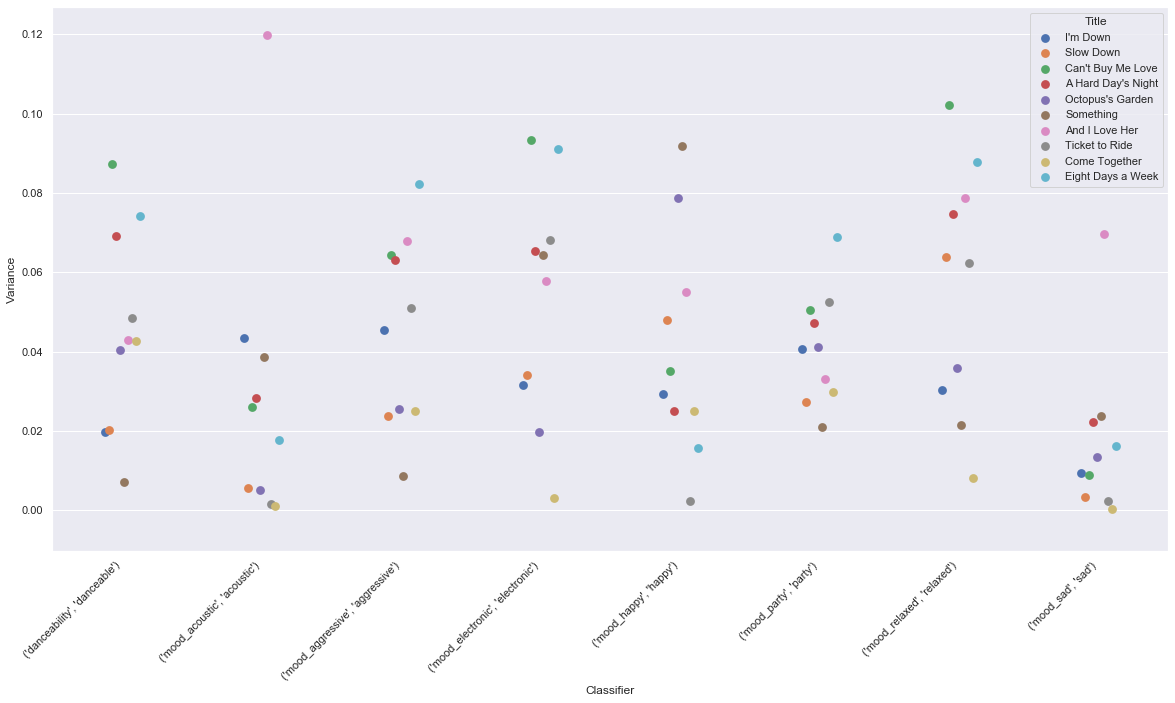

In [62]:
toplot = res_table[['Title', 'Classifier', 'Variance']]
fig = plt.figure(figsize=(20,10))
ax = sns.pointplot(data=toplot, x='Classifier', y='Variance', hue='Title', dodge=True, join=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [64]:
## FILTERING ON METADATA TO MAXIMALLY CONTROL THE DATA
filtered = acousticbrainz.loc[indexes]
filtered.index.set_names(['mbid', 'subno'], inplace=True)

# Find groups with same version and codec (can not group by bitrate without losing too much data) that have at least 50 submissions
groupers = ['codec', 'mbid', 'essentia_low', 'essentia_git_sha_low', 'essentia_build_sha_low']
grouped = filtered.groupby(groupers).size()
groups_to_analyze = pd.DataFrame(grouped[grouped > 50].sort_values(ascending=False))

display(groups_to_analyze)
groups_to_analyze = groups_to_analyze.reset_index()

0
codec mbid                                 essentia_low essentia_git_sha_low  essentia_build_sha_low                       
aac   ee898790-133f-445a-874f-d996abd843af 2.1-beta2    v2.1_beta2-1-ge3940c0 2d9f1f26377add8aeb1075a9c2973f962c4f09fd  118
      b2b50082-0bd1-4702-9a95-3499a4e5781b 2.1-beta2    v2.1_beta2-1-ge3940c0 2d9f1f26377add8aeb1075a9c2973f962c4f09fd   97
      00c47ea6-3a10-4a32-b1f1-990ac756c6a0 2.1-beta2    v2.1_beta2-1-ge3940c0 2d9f1f26377add8aeb1075a9c2973f962c4f09fd   63
      c1d63906-f64a-4cd1-9873-9f3a9f98883c 2.1-beta2    v2.1_beta2-1-ge3940c0 2d9f1f26377add8aeb1075a9c2973f962c4f09fd   58
      63dd7ef6-6d6e-44d5-a4d9-190e49223077 2.1-beta2    v2.1_beta2-1-ge3940c0 2d9f1f26377add8aeb1075a9c2973f962c4f09fd   53
      15127932-c879-466e-b0f8-a1c5022d16e7 2.1-beta2    v2.1_beta2-1-ge3940c0 2d9f1f26377add8aeb1075a9c2973f962c4f09fd   52

In [65]:
groups_to_analyze['Title'] = groups_to_analyze['mbid'].apply(lambda x: titles[x])
groups_to_analyze[['Title', 'codec', 'essentia_low', 'essentia_git_sha_low', 'essentia_build_sha_low', 0]]

,Title,codec,essentia_low,essentia_git_sha_low,essentia_build_sha_low,0
0,I'm Down,aac,2.1-beta2,v2.1_beta2-1-ge3940c0,2d9f1f26377add8aeb1075a9c2973f962c4f09fd,118
1,Slow Down,aac,2.1-beta2,v2.1_beta2-1-ge3940c0,2d9f1f26377add8aeb1075a9c2973f962c4f09fd,97
2,Ticket to Ride,aac,2.1-beta2,v2.1_beta2-1-ge3940c0,2d9f1f26377add8aeb1075a9c2973f962c4f09fd,63
3,A Hard Day's Night,aac,2.1-beta2,v2.1_beta2-1-ge3940c0,2d9f1f26377add8aeb1075a9c2973f962c4f09fd,58
4,Eight Days a Week,aac,2.1-beta2,v2.1_beta2-1-ge3940c0,2d9f1f26377add8aeb1075a9c2973f962c4f09fd,53
5,Octopus's Garden,aac,2.1-beta2,v2.1_beta2-1-ge3940c0,2d9f1f26377add8aeb1075a9c2973f962c4f09fd,52


Thus, we can filter on v2.1_beta2-1-ge3940c0, 2d9f1f26377add8aeb1075a9c2973f962c4f09fd with codec aac to control the metadata as much as possible while retaining some samples

In [81]:
filt = ((filtered.index.get_level_values(level=0).isin(groups_to_analyze['mbid'])) 
        & (filtered['codec'] == 'aac') & (filtered['essentia_low'] == '2.1-beta2')
       & (filtered['essentia_git_sha_low'] == 'v2.1_beta2-1-ge3940c0') 
       & (filtered['essentia_build_sha_low'] == '2d9f1f26377add8aeb1075a9c2973f962c4f09fd'))

controlled = filtered[filt][cols].groupby('mbid').var()
controlled = controlled.reset_index()
display(controlled)

,mbid,"(danceability, danceable)","(mood_acoustic, acoustic)","(mood_aggressive, aggressive)","(mood_electronic, electronic)","(mood_happy, happy)","(mood_party, party)","(mood_relaxed, relaxed)","(mood_sad, sad)"
0,00c47ea6-3a10-4a32-b1f1-990ac756c6a0,0.052516,0.001594,0.041407,0.046502,0.002352,0.038993,0.049583,0.001583
1,15127932-c879-466e-b0f8-a1c5022d16e7,0.036074,0.003263,0.020883,0.014707,0.098657,0.014955,0.023904,0.007468
2,63dd7ef6-6d6e-44d5-a4d9-190e49223077,0.070704,0.021278,0.079049,0.065768,0.017480,0.061032,0.076256,0.016546
3,b2b50082-0bd1-4702-9a95-3499a4e5781b,0.017601,0.005771,0.022203,0.009202,0.038446,0.012613,0.045961,0.003347
4,c1d63906-f64a-4cd1-9873-9f3a9f98883c,0.060338,0.033907,0.076530,0.057413,0.031190,0.041066,0.059357,0.027474
5,ee898790-133f-445a-874f-d996abd843af,0.020848,0.046340,0.040026,0.023046,0.024237,0.029127,0.021352,0.009983


In [82]:
controlled['mbid'] = controlled['mbid'].apply(lambda x: titles[x])
controlled.columns = ['Title' if x == 'mbid' else x for x in controlled.columns]
controlled

,Title,"(danceability, danceable)","(mood_acoustic, acoustic)","(mood_aggressive, aggressive)","(mood_electronic, electronic)","(mood_happy, happy)","(mood_party, party)","(mood_relaxed, relaxed)","(mood_sad, sad)"
0,Ticket to Ride,0.052516,0.001594,0.041407,0.046502,0.002352,0.038993,0.049583,0.001583
1,Octopus's Garden,0.036074,0.003263,0.020883,0.014707,0.098657,0.014955,0.023904,0.007468
2,Eight Days a Week,0.070704,0.021278,0.079049,0.065768,0.017480,0.061032,0.076256,0.016546
3,Slow Down,0.017601,0.005771,0.022203,0.009202,0.038446,0.012613,0.045961,0.003347
4,A Hard Day's Night,0.060338,0.033907,0.076530,0.057413,0.031190,0.041066,0.059357,0.027474
5,I'm Down,0.020848,0.046340,0.040026,0.023046,0.024237,0.029127,0.021352,0.009983


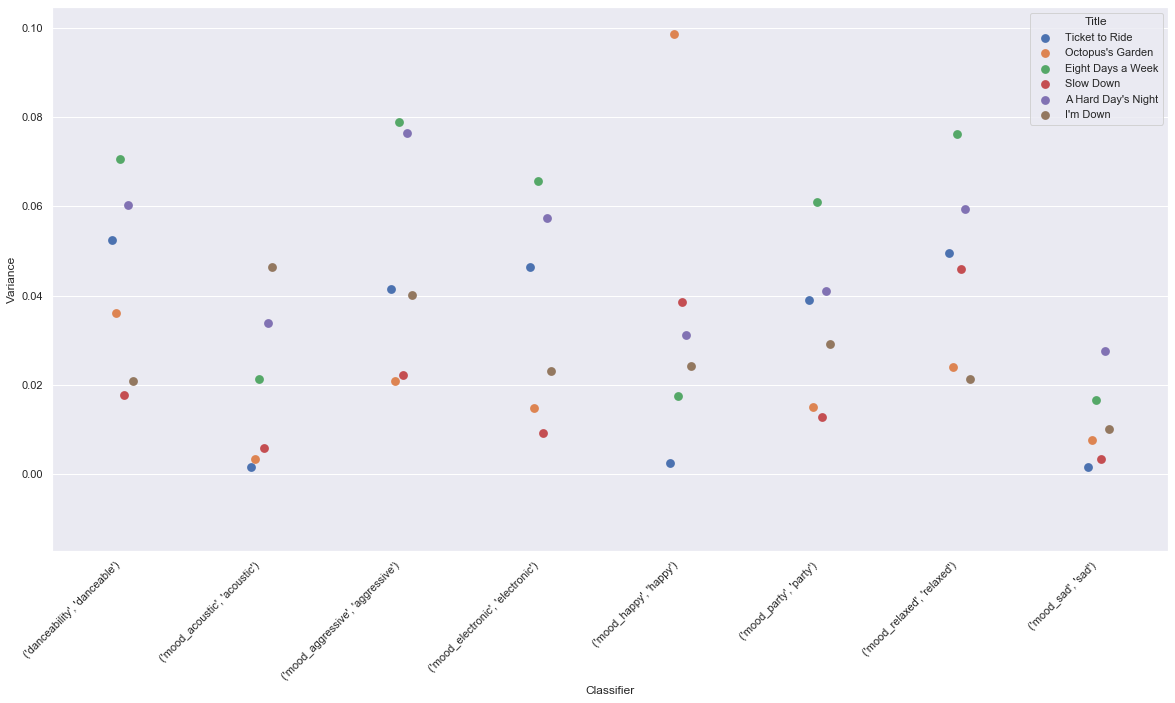

In [92]:
toplot = controlled.melt(id_vars=['Title'])
fig = plt.figure(figsize=(20,10))
ax = sns.pointplot(data=toplot, x='variable', y='value', hue='Title', dodge=True, join=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Classifier')
plt.ylabel('Variance')
plt.show()

These variance are relatively high, sometimes even higher than the pooled variance on the entire set, is this due to the aac codec? Let's also analyze by just grouping on codec:

In [22]:
filtered_flac = filtered[filtered['codec'] == 'flac']
filtered_flac_groupers = ['mbid']
filtered_flac_grouped = filtered_flac.groupby(filtered_flac_groupers)

filtered_flac_grouped = filtered_flac_grouped.size()[filtered_flac_grouped.size() > 1].sort_values(ascending=False)
display(pd.DataFrame(filtered_flac_grouped))

,0
mbid,
659b4269-fe81-40e4-86e9-12879c09c9e6,18
917f2be3-065e-4d1e-8a76-1b50abd1ad95,16
485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf,16
b849acd4-0638-49ea-8e40-7391613d4890,15
c1d63906-f64a-4cd1-9873-9f3a9f98883c,14
15127932-c879-466e-b0f8-a1c5022d16e7,14
63dd7ef6-6d6e-44d5-a4d9-190e49223077,12
b2b50082-0bd1-4702-9a95-3499a4e5781b,3
ee898790-133f-445a-874f-d996abd843af,2


In [30]:
filtered_flac.loc[filtered_flac_grouped.index].groupby('mbid')[cols].var()

,"(danceability, danceable)","(mood_acoustic, acoustic)","(mood_aggressive, aggressive)","(mood_electronic, electronic)","(mood_happy, happy)","(mood_party, party)","(mood_relaxed, relaxed)","(mood_sad, sad)"
mbid,,,,,,,,
15127932-c879-466e-b0f8-a1c5022d16e7,4.243018e-02,7.307231e-03,7.794459e-02,1.031616e-02,4.693497e-02,3.078055e-02,7.408791e-03,1.022962e-02
485bbe7f-d0f7-4ffe-8adb-0f1093dd2dbf,2.211650e-05,5.818332e-04,6.196116e-03,2.099431e-03,1.320003e-02,5.925266e-03,5.026669e-03,2.909719e-04
63dd7ef6-6d6e-44d5-a4d9-190e49223077,7.470611e-02,1.349505e-02,8.487102e-02,7.507530e-02,9.548625e-03,7.241582e-02,1.123707e-01,9.803410e-03
659b4269-fe81-40e4-86e9-12879c09c9e6,4.139450e-02,1.504815e-02,8.363015e-02,9.320712e-02,4.196093e-04,5.190346e-02,8.842512e-02,3.033647e-03
917f2be3-065e-4d1e-8a76-1b50abd1ad95,1.408748e-02,8.812775e-03,8.314813e-06,9.191489e-03,3.958103e-02,4.304152e-03,7.664100e-03,6.461431e-04
b2b50082-0bd1-4702-9a95-3499a4e5781b,1.949093e-08,7.232188e-08,5.489298e-11,1.521036e-08,2.914770e-08,2.597382e-07,6.976522e-09,2.789775e-10
b849acd4-0638-49ea-8e40-7391613d4890,9.422615e-03,1.321499e-02,3.987070e-04,2.523175e-03,3.498389e-02,4.070486e-03,1.168639e-02,2.929454e-03
c1d63906-f64a-4cd1-9873-9f3a9f98883c,6.417421e-02,2.391851e-03,2.990651e-02,1.321092e-02,6.510943e-03,2.078614e-02,5.711904e-02,1.543619e-03
ee898790-133f-445a-874f-d996abd843af,6.915322e-10,2.779445e-09,6.267626e-10,2.460839e-09,3.133494e-10,3.572385e-08,8.211210e-13,1.638029e-07
